In [1]:
#get market data
import pandas as pd
df = pd.read_csv("Stock_Price.csv")[2:]

In [4]:
#get growth rate of daily price
df['Adj Close'] = pd.to_numeric(df['Adj Close'],errors='coerce')
df['Open'] = pd.to_numeric(df['Open'],errors='coerce')
df['Daily Growth'] = (df['Adj Close']-df['Open'])/df['Open']
df.head()

,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth
2,2016-09-26,2158.5400390625,2145.0400390625,2158.540039,2146.10009765625,3216170000,2146.100098,-0.005763
3,2016-09-27,2161.1298828125,2141.550048828125,2146.040039,2159.929931640625,3437770000,2159.929932,0.006472
4,2016-09-28,2172.39990234375,2151.7900390625,2161.850098,2171.3701171875,3891460000,2171.370117,0.004404
5,2016-09-29,2172.669921875,2145.199951171875,2168.899902,2151.1298828125,4249220000,2151.129883,-0.008193
6,2016-09-30,2175.300048828125,2156.510009765625,2156.510010,2168.27001953125,4173340000,2168.270020,0.005453


In [5]:
# Statistical Description of Daily Growth
import pandas as pd
s = df['Daily Growth']
s.describe()

count    508.000000
mean       0.000185
std        0.005713
min       -0.038737
25%       -0.001881
50%        0.000442
75%        0.002863
max        0.030733
Name: Daily Growth, dtype: float64

In [6]:
# Statistical Distribution of Daily Growth
import seaborn as sns
sns.distplot(s)
sns.distplot(s,hist=False, rug=True)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-2.99693763e+00, -2.71541584e+00, -2.55714766e+00, -2.44494005e+00,
         -2.35702910e+00, -2.28426461e+00, -2.22189850e+00, -2.16713782e+00,
         -2.11819534e+00, -2.07385576e+00, -2.03325378e+00, -1.99575065e+00,
         -1.96086089e+00, -1.92820660e+00, -1.89748759e+00, -1.86846133e+00,
         -1.84092891e+00, -1.81472515e+00, -1.78971127e+00, -1.76576954e+00,
         -1.74279917e+00, -1.72071318e+00, -1.69943600e+00, -1.67890149e+00,
         -1.65905145e+00, -1.63983438e+00, -1.62120450e+00, -1.60312088e+00,
         -1.58554681e+00, -1.56844922e+00, -1.55179822e+00, -1.53556667e+00,
         -1.51972989e+00, -1.50426535e+00, -1.48915242e+00, -1.47437215e+00,
         -1.45990713e+00, -1.44574128e+00, -1.43185975e+00, -1.41824878e+00,
         -1.40489560e+00, -1.39178833e+00, -1.37891589e+00, -1.36626798e+00,
         -1.35383492e+00, -1.34160769e+00, -1.32957782e+00, -1.31773733e+00,
         -1.30607876e+00, -1.29459507e+00, -1.28327960e+00, -1.27212611e+00,

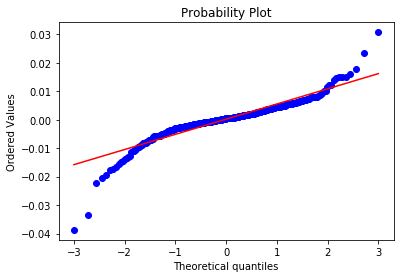

In [7]:
from scipy import stats
import seaborn as sns
stats.probplot(s, plot=sns.mpl.pyplot)

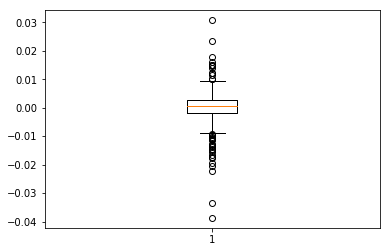

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6ba151e8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6ba151ef60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6ba151e780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ba1528630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ba1528c88>],
 'means': [<matplotlib.lines.Line2D at 0x7f6ba1528978>]}

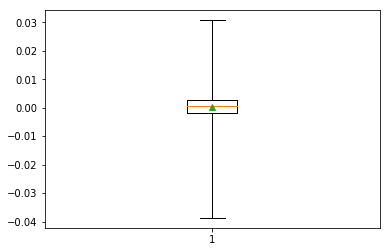

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(s)
plt.show()
plt.boxplot(s, showmeans=True, whis = 99)

In [9]:
import numpy as np
np.percentile(s,20)

-0.002549464967838964

<font face="Times New Roman" size=3 color=#000000>
We could find that the distribution of daily growth is approximately symmetric around 0. Also, we believe that investors all pay attention to the deviation. Therefore we firstly choose 1-sigma to lable y. That is, we lable y as 0 when it is in [0.000185-0.005713, 0.000185+0.005713]

In [10]:
[0.000185-0.005713, 0.000185+0.005713]

[-0.005528, 0.0058980000000000005]

In [16]:
# Labeling Y using 1-sigma interval

LabledY1 = []

for row in df['Daily Growth']:
    if row < -0.005528:
        LabledY1.append(-1)
    elif row > 0.005898:
        LabledY1.append(1)
    else:
        LabledY1.append(0)

df['LabledY1'] = LabledY1
        

<font face="Times New Roman" size=3 color=#000000>
    However, we find there are too many zeroes in y, which means it is insensitive to everything and would be biased in future test. Therefore, we choose 0.5-sigma instead.

In [17]:
[0.000185-0.5*0.005713, 0.000185+0.5*0.005713]

[-0.0026715000000000003, 0.0030415]

In [19]:
# Labeling Y using 1-sigma interval

LabledY2 = []

for row in df['Daily Growth']:
    if row < -0.0026715:
        LabledY2.append(-1)
    elif row > 0.0030415:
        LabledY2.append(1)
    else:
        LabledY2.append(0)

df['LabledY2'] = LabledY2
df.head()

,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY1,LabledY2
2,2016-09-26,2158.5400390625,2145.0400390625,2158.540039,2146.10009765625,3216170000,2146.100098,-0.005763,-1,-1
3,2016-09-27,2161.1298828125,2141.550048828125,2146.040039,2159.929931640625,3437770000,2159.929932,0.006472,1,1
4,2016-09-28,2172.39990234375,2151.7900390625,2161.850098,2171.3701171875,3891460000,2171.370117,0.004404,0,1
5,2016-09-29,2172.669921875,2145.199951171875,2168.899902,2151.1298828125,4249220000,2151.129883,-0.008193,-1,-1
6,2016-09-30,2175.300048828125,2156.510009765625,2156.510010,2168.27001953125,4173340000,2168.270020,0.005453,0,1


In [20]:
df.to_csv('LabeledY.csv')